In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("dataset3 - Sheet1.csv")
print(df.head())

   PassengerId  Survived  Pclass                                  Name  \
0            1         1       3                    Allen, Mr. William   
1            2         0       1              Bonnell, Miss. Elizabeth   
2            3         1       3           Saundercock, Mr. William H.   
3            4         1       1           Andersson, Mr. Anders Johan   
4            5         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

      Sex  Age  SibSp  Parch     Ticket   Fare Cabin Embarked  
0    male   35      0      0     373450   8.05   NaN        S  
1  female   58      0      0     113781  26.55  C103        C  
2    male   20      0      0  A/5. 2151   7.25   NaN        S  
3    male   39      1      5     347082  31.28   NaN        S  
4  female   14      0      0     350406   7.75   NaN        S  


In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          7
Embarked       0
dtype: int64

In [22]:
# drop cabin column because in this column there is 70% null entry
df = df.drop(['Cabin'],axis = 1)

KeyError: "['Cabin'] not found in axis"

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Allen, Mr. William",male,35,0,0,373450,8.05,S
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C
2,3,1,3,"Saundercock, Mr. William H.",male,20,0,0,A/5. 2151,7.25,S
3,4,1,1,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.28,S
4,5,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.75,S
5,6,0,3,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.00,S
6,7,1,2,"Rice, Master. Eugene",male,2,4,1,382652,29.12,Q
7,8,0,2,"Williams, Mr. Charles Eugene",male,30,0,0,244373,13.00,S
8,9,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36,1,0,113803,53.10,C
9,10,0,3,"McCarthy, Mr. Timothy J.",male,54,0,0,17463,51.86,S


In [25]:
# Perform grouping & aggregation
#Survival Rate by Gender
df.groupby('Sex')['Survived'].mean()

#Survival Rate by Class
df.groupby('Pclass')['Survived'].mean()

#Survival Rate by Gender & Class
df.groupby(['Sex', 'Pclass'])['Survived'].mean()


Sex     Pclass
female  1         0.500000
        3         0.000000
male    1         1.000000
        2         0.500000
        3         0.666667
Name: Survived, dtype: float64

# Create visualizations:


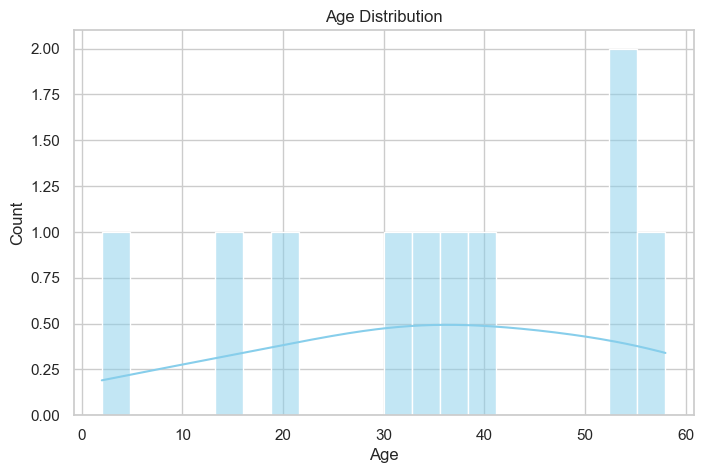

In [28]:
#Age distribution (histogram)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


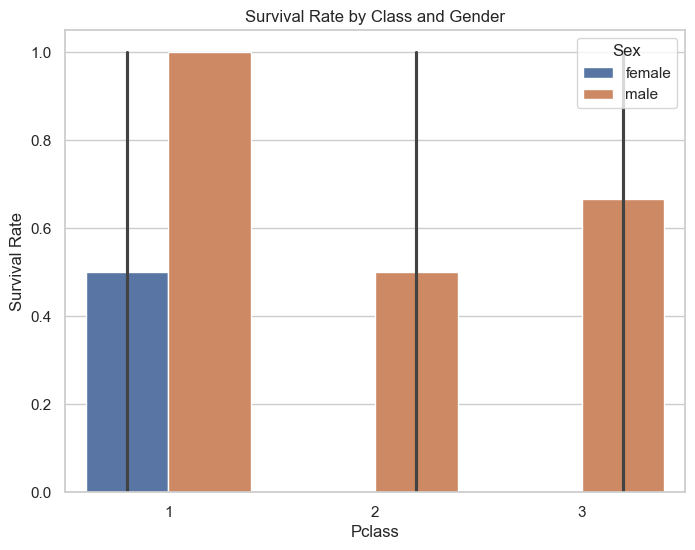

In [30]:
#Survival by Class and Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()


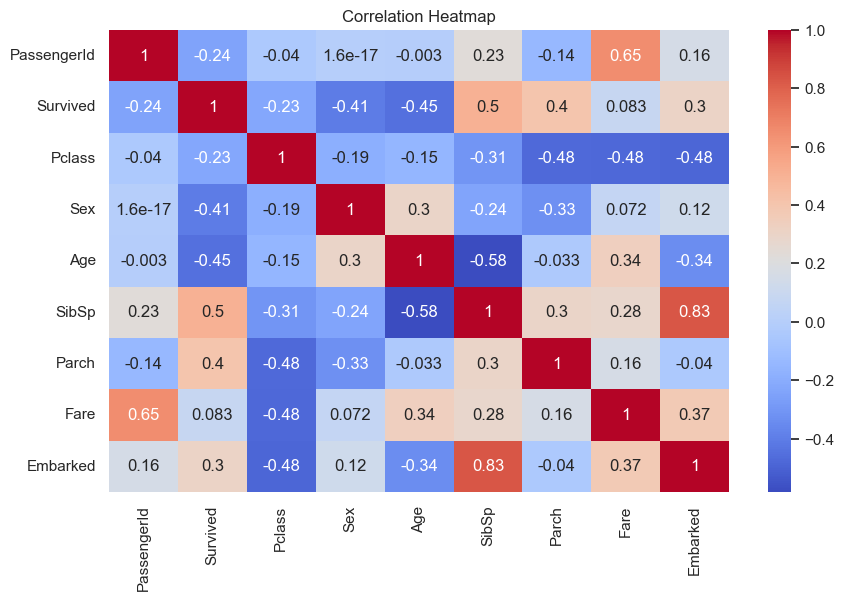

In [32]:
# Correlation Heatmap
# First we have to Drop non-numeric columns for correlation
df_encoded = df.copy()

# Encode categorical columns
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop columns that are not useful or not numeric
df_encoded = df_encoded.drop(columns=['Name', 'Ticket'])

# Now plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 # Summary